In [30]:
#import libraries
import os
import sys
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
#load dataset
dataset_train = pd.read_csv("Bharatintern_Stock_Price_Train.csv")
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [32]:
training_set = dataset_train.iloc[:,1:2]
print(training_set)
print(training_set.shape)

        Open
0     325.25
1     331.27
2     329.83
3     328.34
4     322.04
...      ...
1253  790.90
1254  790.68
1255  793.70
1256  783.33
1257  782.75

[1258 rows x 1 columns]
(1258, 1)


In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
scaled_training_set = scaler.fit_transform(training_set)

scaled_training_set

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [35]:
X_train = []
Y_train = []
for i in range(60,1258):
    X_train.append(scaled_training_set[i-60:i,0])
    Y_train.append(scaled_training_set[i,0])
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [36]:
print(X_train.shape)
print(X_train)
print(Y_train.shape)

(1198, 60)
[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]
(1198,)


In [37]:
X_train =  np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1198, 60, 1)

In [38]:
from keras.models import Sequential
#from tensorflow.keras import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [39]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences= True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

In [40]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train,Y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 26s 197ms/step - loss: 0.0563
Epoch 2/100
38/38 [==============================] - 7s 185ms/step - loss: 0.0074
Epoch 3/100
38/38 [==============================] - 7s 185ms/step - loss: 0.0057
Epoch 4/100
38/38 [==============================] - 7s 192ms/step - loss: 0.0050
Epoch 5/100
38/38 [==============================] - 8s 210ms/step - loss: 0.0055
Epoch 6/100
38/38 [==============================] - 7s 195ms/step - loss: 0.0056
Epoch 7/100
38/38 [==============================] - 8s 200ms/step - loss: 0.0049
Epoch 8/100
38/38 [==============================] - 8s 206ms/step - loss: 0.0046
Epoch 9/100
38/38 [==============================] - 8s 199ms/step - loss: 0.0051
Epoch 10/100
38/38 [==============================] - 8s 223ms/step - loss: 0.0049
Epoch 11/100
38/38 [==============================] - 8s 224ms/step - loss: 0.0061
Epoch 12/100
38/38 [==============================] - 8s 207ms/step - loss: 0.0045
Epoch 13/100

In [41]:
dataset_test = pd.read_csv("Bharatintern_Stock_Price_Train.csv")
actual_stock_price = dataset_test.iloc[:500,1:2].values

In [42]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values

inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

x_test = []
for i in range(60,500):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [43]:
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

14/14 [==============================] - 4s 60ms/step


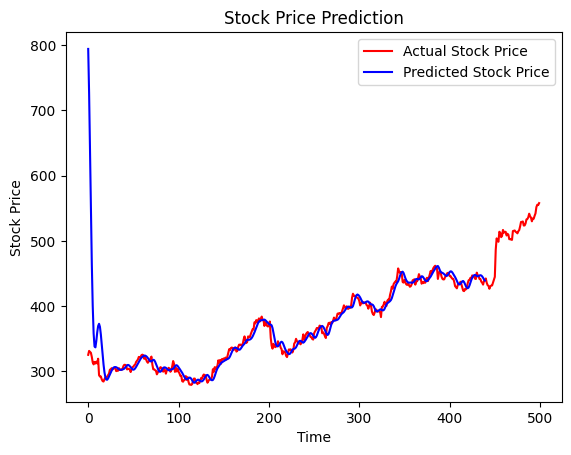

In [44]:
x = [0.0,2.5,5.0,8.0,10.0,13.0,15.0,18.0,19.0]
y = [770,780,790,800,810,820,830,840,850]
ax= plt.subplot()
plt.plot(actual_stock_price,color='red',label='Actual Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()